# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points, title="none"):
    vis = Visualizer()
    vis.add_title(title)
    vis.add_grid()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right, title="none"):
    vis = Visualizer()
    vis.add_title(title)
    vis.add_grid()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='black')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [4]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

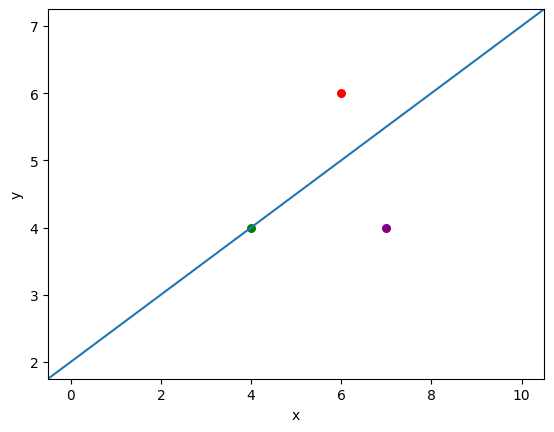

In [5]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [6]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [(np.random.uniform(left, right), np.random.uniform(left, right)) for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [7]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

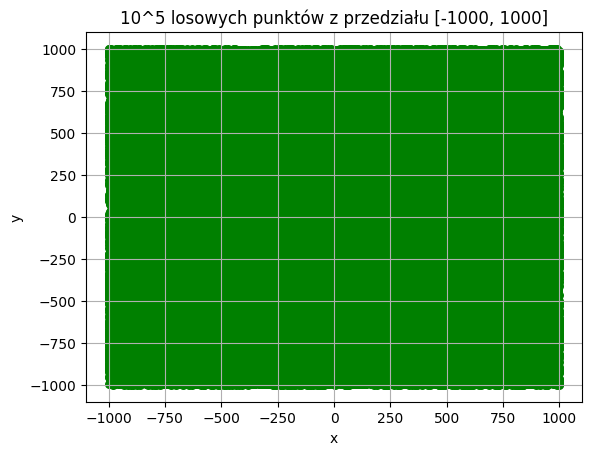

In [8]:
draw_points(points_a, "10^5 losowych punktów z przedziału [-1000, 1000]")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [9]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5, )

Zwizualizuj wygenerowane punkty.

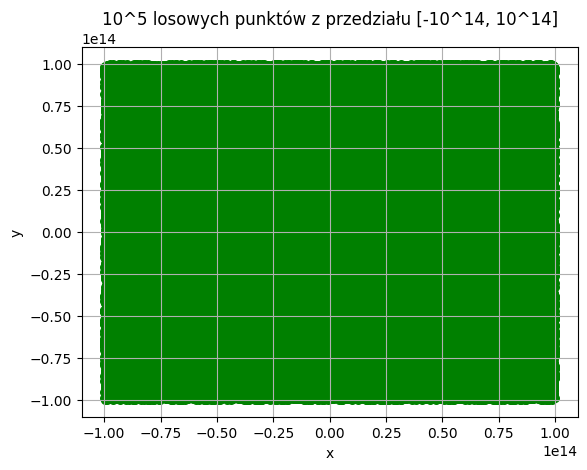

In [10]:
draw_points(points_b, "10^5 losowych punktów z przedziału [-10^14, 10^14]")

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [11]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    tab = [None for _ in range(n)]
    for i in range(n):
        alpha = 2 * np.pi * np.random.random_sample()
        tab[i] = (O[0] + R * np.cos(alpha), O[1] + R * np.sin(alpha))
    return tab

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [12]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

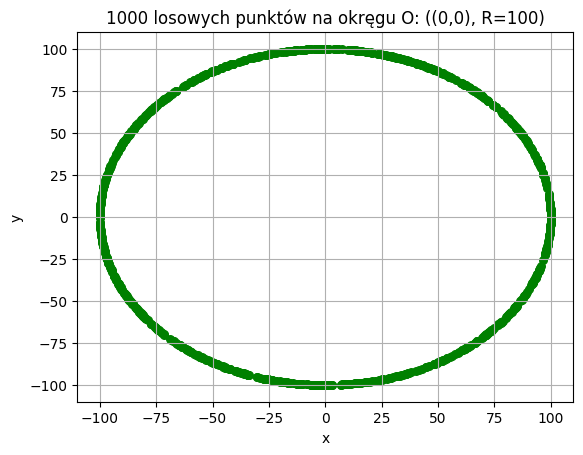

In [13]:
draw_points(points_c, "1000 losowych punktów na okręgu O: ((0,0), R=100)")

Uzupełnij funkcję ```generate_collinear_points```.

In [14]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    tab = [None for _ in range(n)]
    for i in range(n):
        x = np.random.uniform(-1000, 1000)
        y = 0.05 * x + 0.05
        tab[i] = (x, y)
    return tab

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [15]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

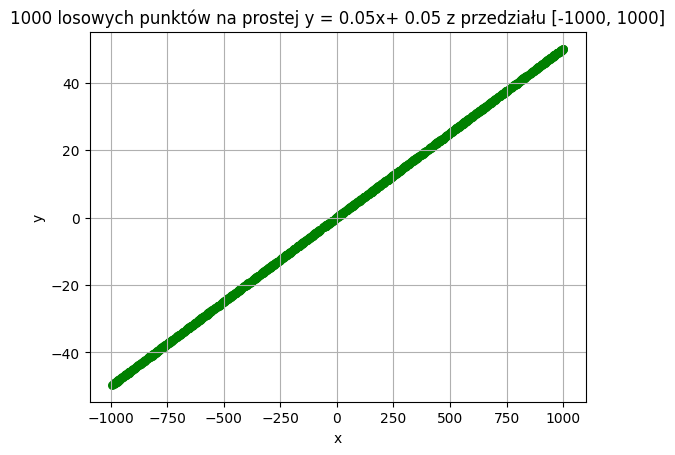

In [16]:
draw_points(points_d, "1000 losowych punktów na prostej y = 0.05x+ 0.05 z przedziału [-1000, 1000]")

Przeprowadź test poprawności powyższych funkcji

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.812s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [18]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0] * b[1] + a[1] * c[0] + b[0] * c[1] - c[0] * b[1] - c[1] * a[0] - b[0] * a[1]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [19]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return np.linalg.det([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])

Uzupełnij funkcje ```mat_det_2x2```

In [20]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [21]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return np.linalg.det([[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]])

Przetestujmy napisane powyżej funkcje.

In [22]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [23]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    right = []
    mid = []
    for x, y in points:
        det = mat_det_func(a, b, (x, y))
        if det < -eps:
            right.append((x, y))
        elif det > eps:
            left.append((x, y))
        else:
            mid.append((x, y))
    return left, mid, right

In [24]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [25]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

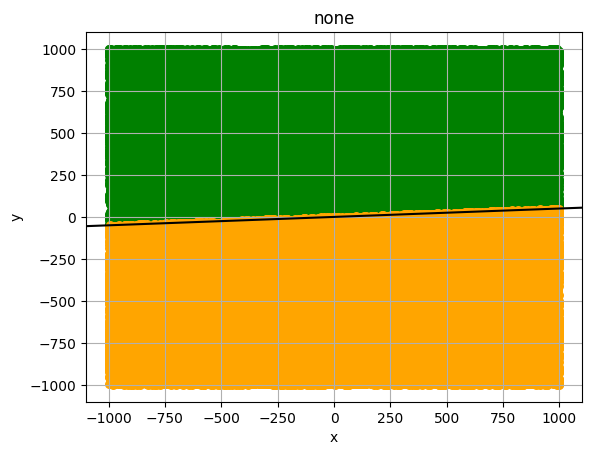

In [26]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [27]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

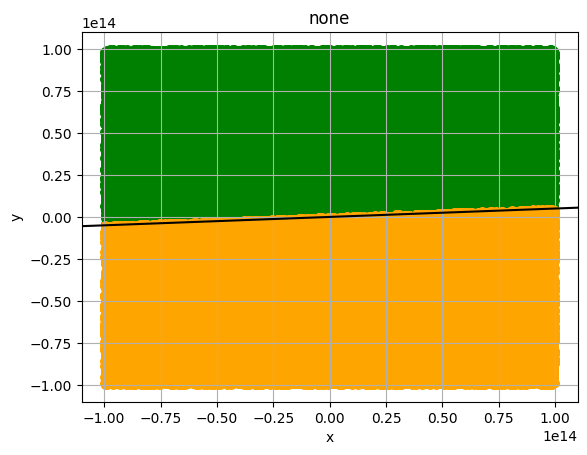

In [28]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [29]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

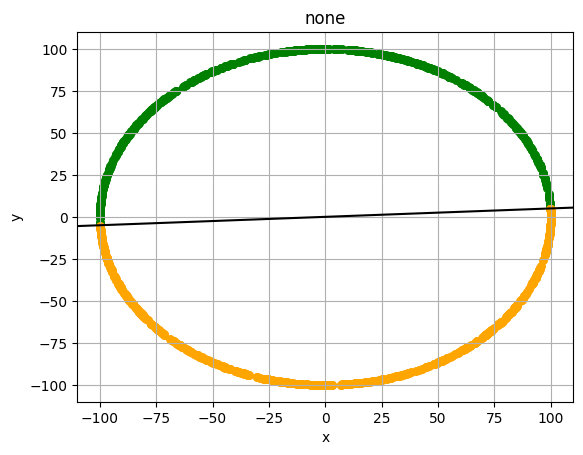

In [30]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [31]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

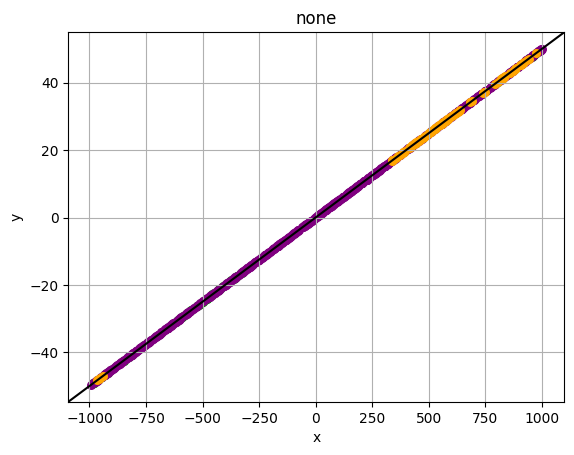

In [32]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [33]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


                 1.000000e-08  1.000000e-10  1.000000e-12  1.000000e-14
mat_det_3x3               1.0           1.0         1.000         1.000
mat_det_2x2               1.0           1.0         0.820         0.695
mat_det_3x3_lib           1.0           1.0         1.000         0.880
mat_det_2x2_lib           1.0           1.0         0.806         0.722
                 1.000000e-08  1.000000e-10  1.000000e-12  1.000000e-14
mat_det_3x3           0.00000      0.000000      0.000000           0.0
mat_det_2x2           0.00000      0.000000      0.000000           0.0
mat_det_3x3_lib       0.00000      0.000000      0.015625           0.0
mat_det_2x2_lib       0.03125      0.015625      0.000000           0.0


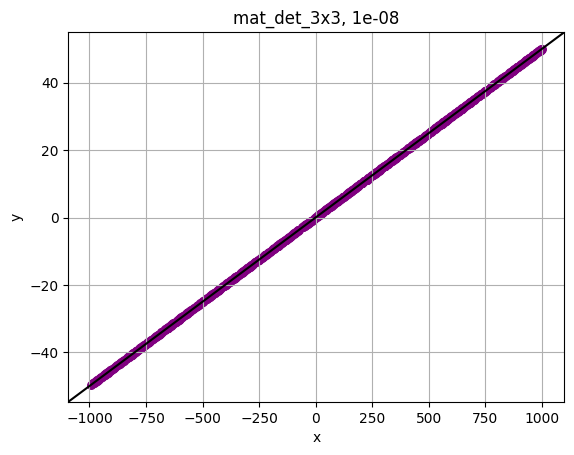

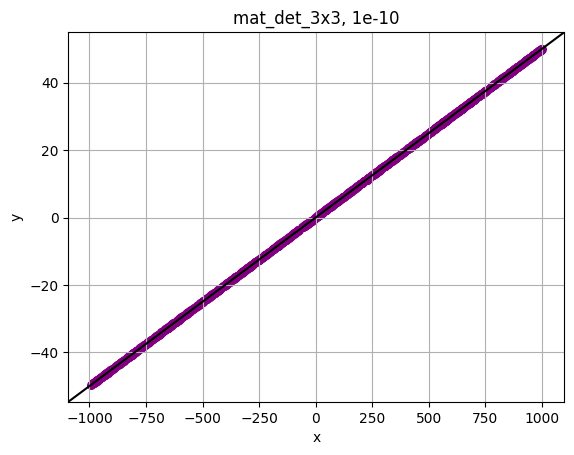

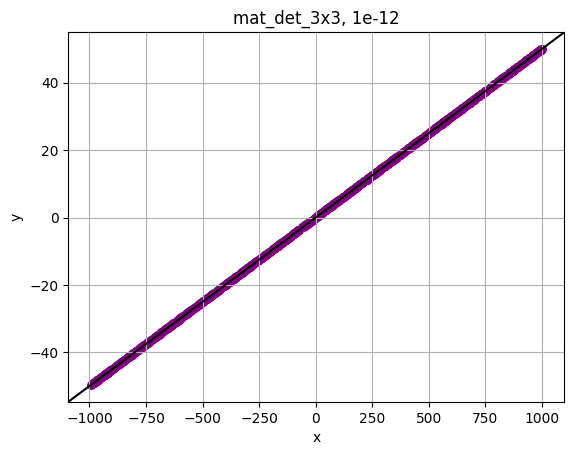

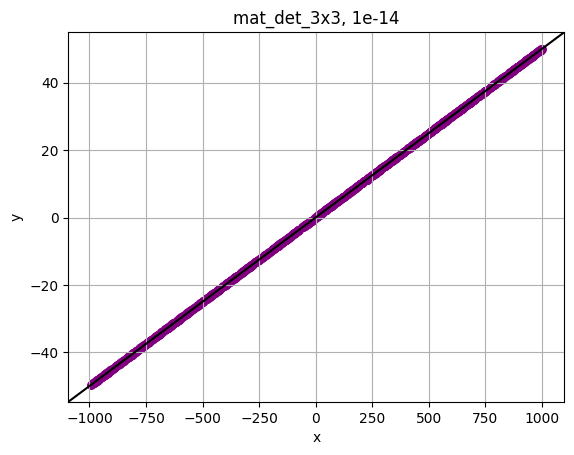

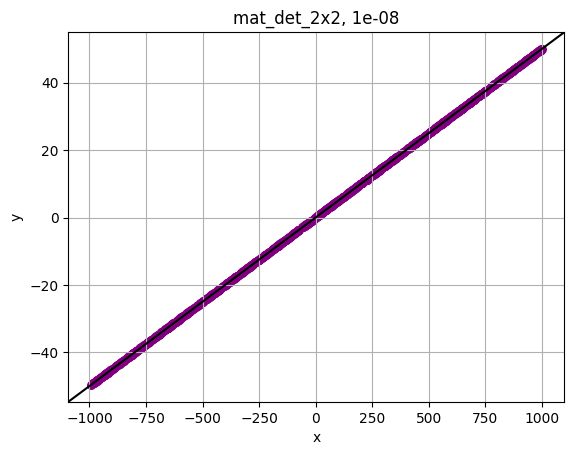

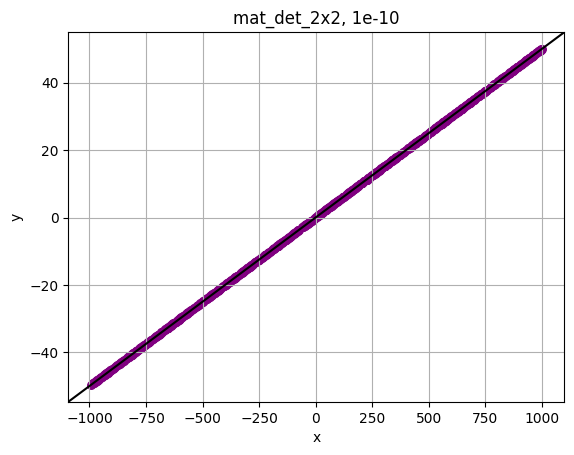

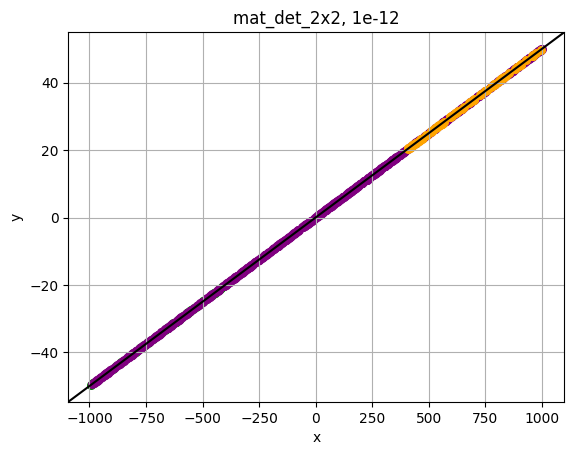

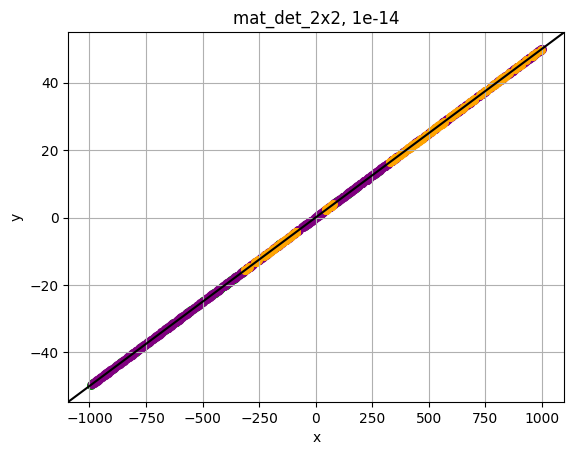

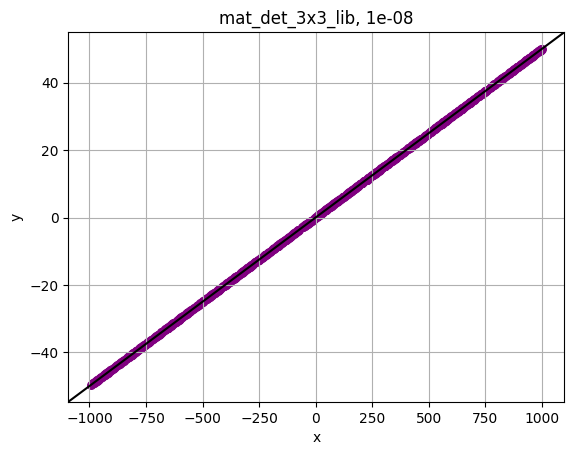

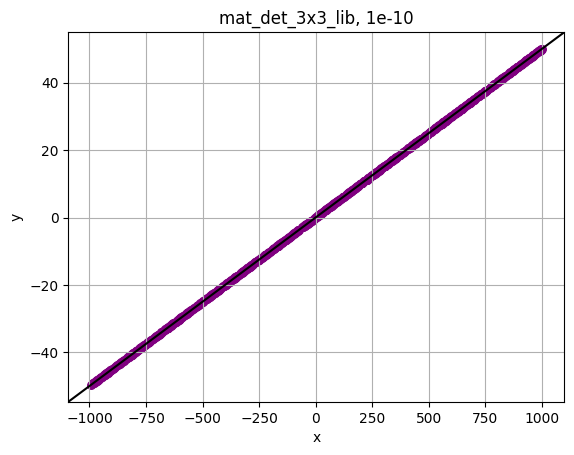

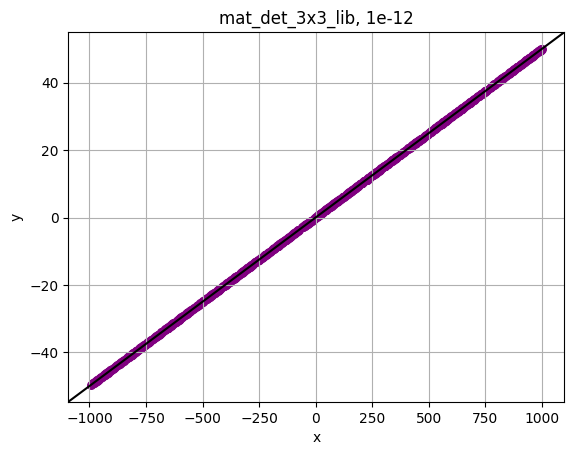

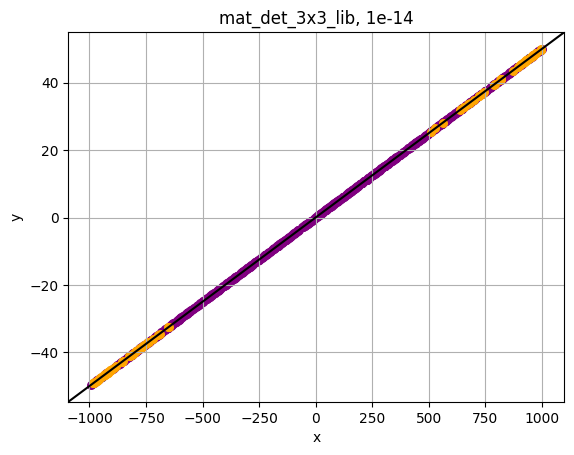

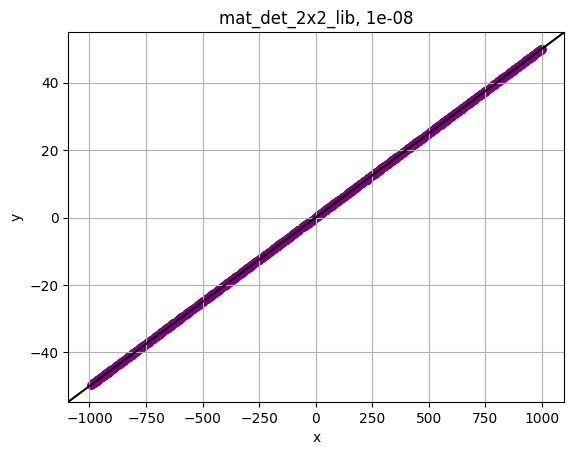

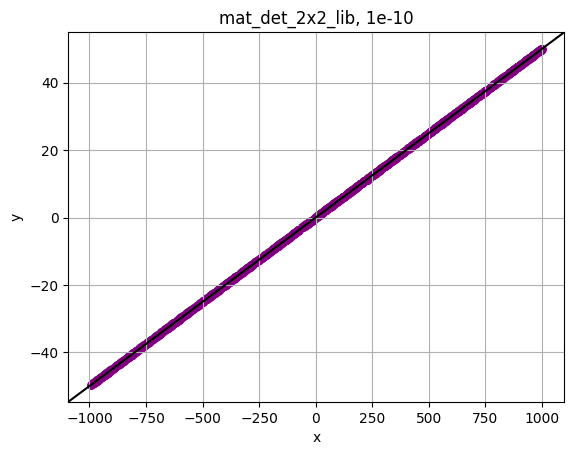

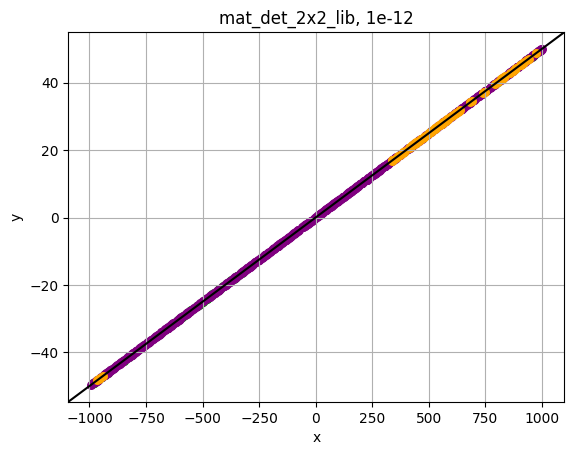

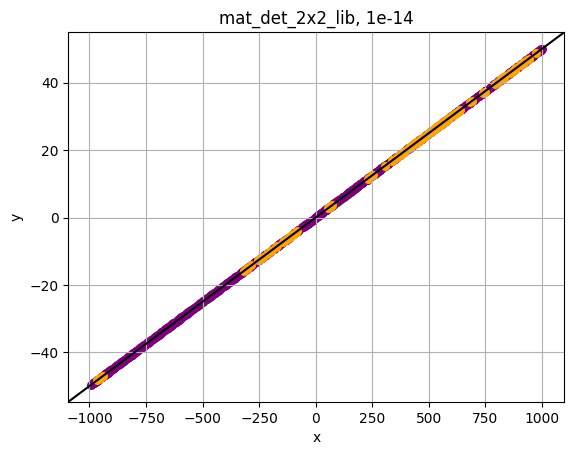

In [34]:
def fun(x):
    return 0.05*x+0.05

points64 = [points_a, points_b, points_c, points_d]
det = [mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib]
eps = [10**-8, 10**-10, 10**-12, 10**-14]

row_labels = ['mat_det_3x3', 'mat_det_2x2', 'mat_det_3x3_lib', 'mat_det_2x2_lib']
data = [[] for _ in range(4)]
from time import process_time
data2 = [[] for _ in range(4)]

i = 0
for d in det:
    for e in eps:
        time_s = process_time()
        l, m, r = categorize_points(points_d, a, b, d, e)
        time_e = process_time()
        data2[i].append(time_e-time_s)
        data[i].append(len(m)/(len(l)+len(m)+len(r)))
        draw_line(l, m, r, d.__name__+", "+str(e))
    i += 1
df = pd.DataFrame(data, columns=eps, index=row_labels)  
print(df)
df = pd.DataFrame(data2, columns=eps, index=row_labels)  
print(df)  


                 1.000000e-08  1.000000e-10  1.000000e-12  1.000000e-14
mat_det_3x3               1.0           1.0         1.000         1.000
mat_det_2x2               1.0           1.0         0.820         0.695
mat_det_3x3_lib           1.0           1.0         1.000         0.880
mat_det_2x2_lib           1.0           1.0         0.806         0.722
                 1.000000e-08  1.000000e-10  1.000000e-12  1.000000e-14
mat_det_3x3               0.0           0.0      0.015625           0.0
mat_det_2x2               0.0           0.0      0.000000           0.0
mat_det_3x3_lib           0.0           0.0      0.000000           0.0
mat_det_2x2_lib           0.0           0.0      0.000000           0.0


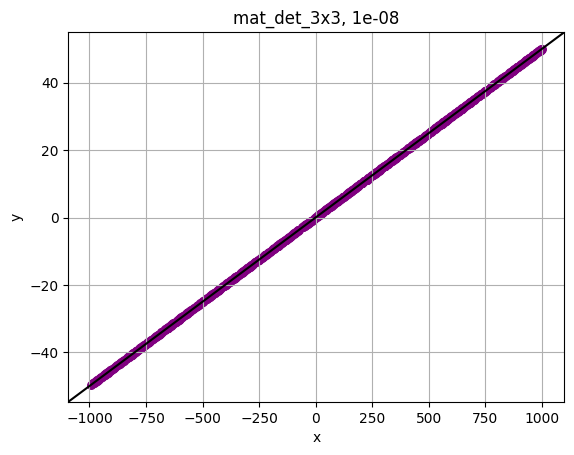

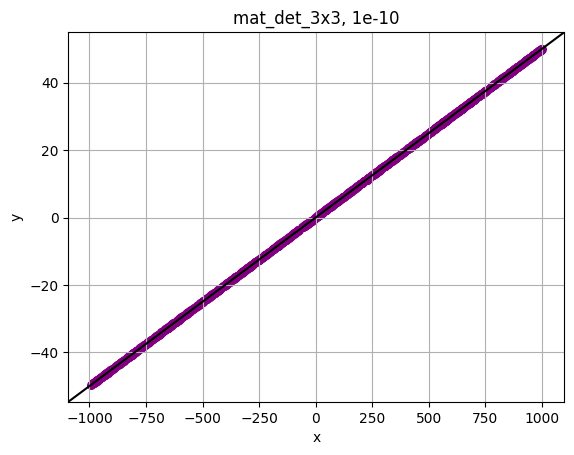

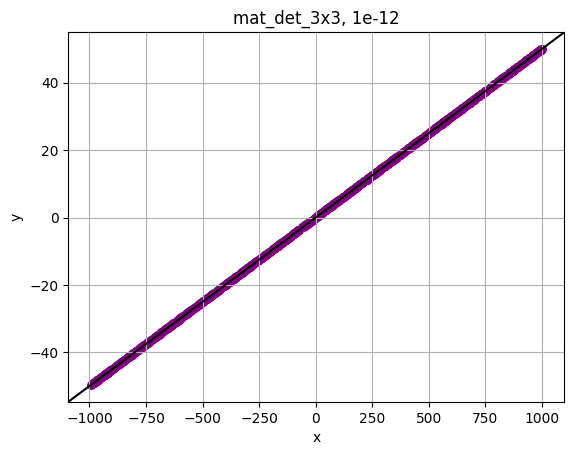

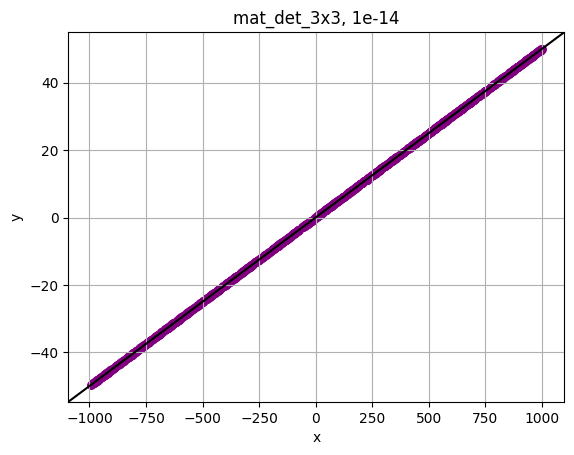

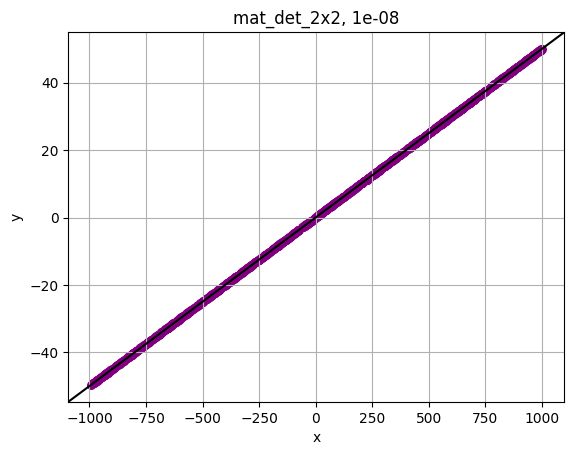

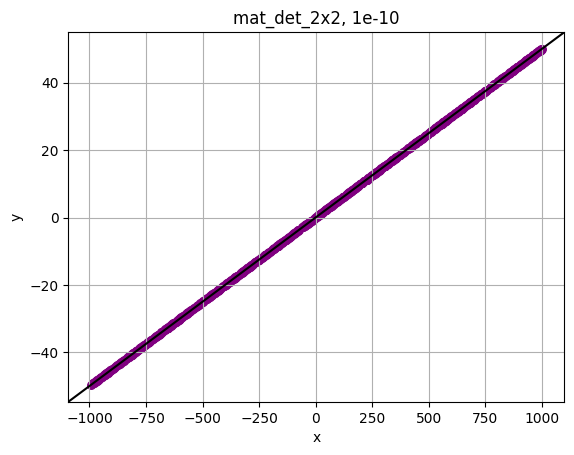

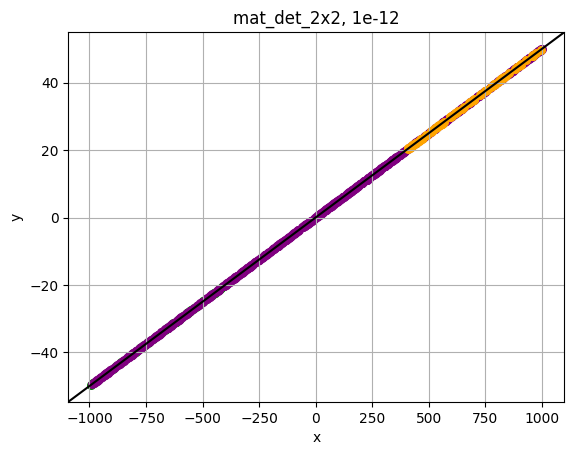

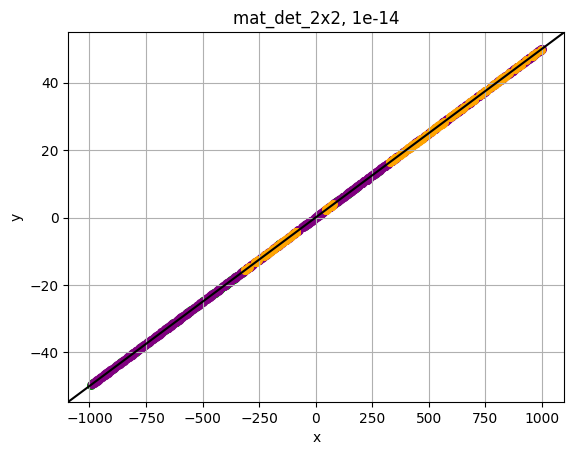

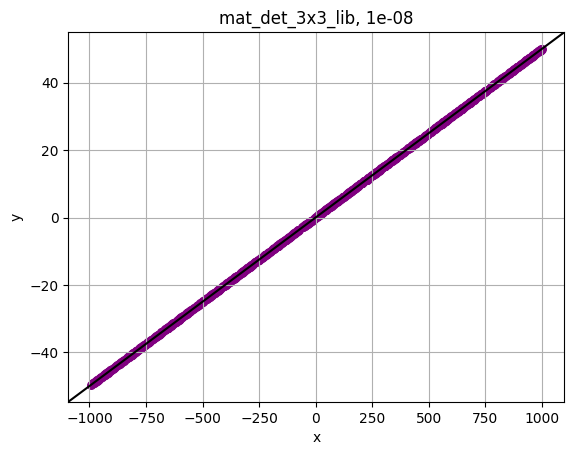

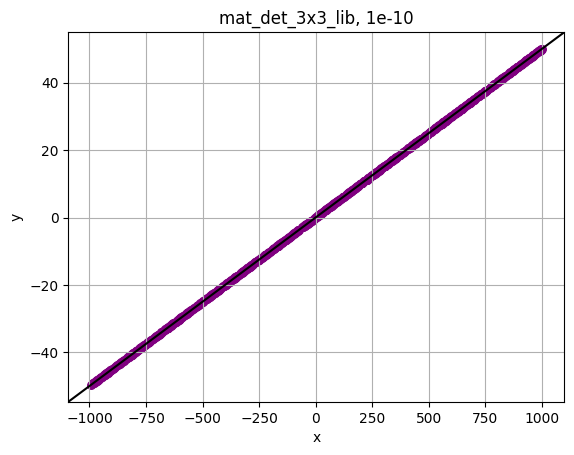

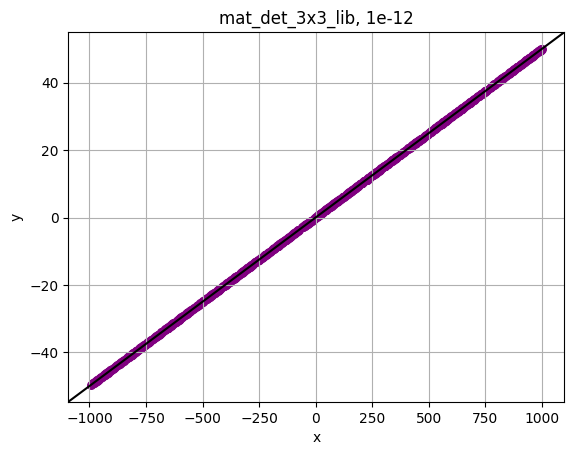

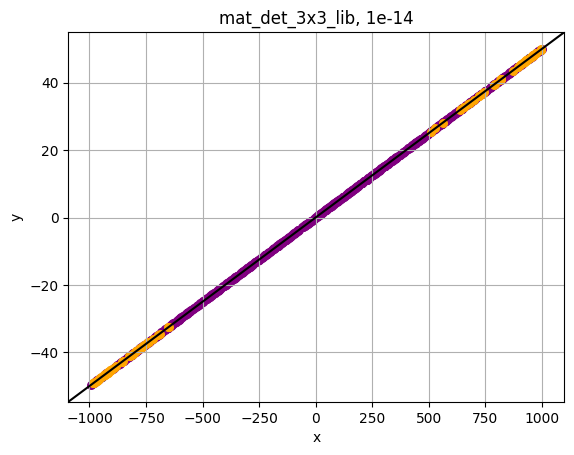

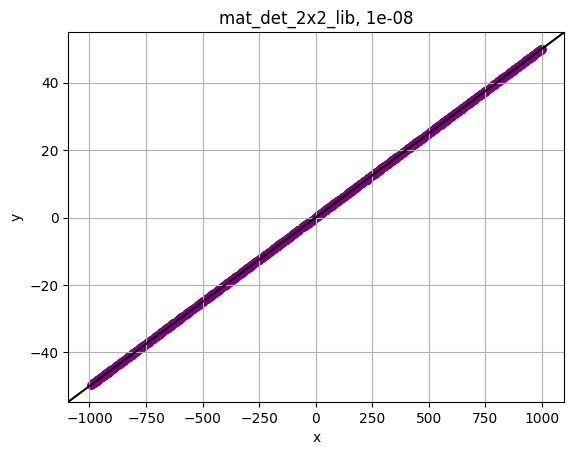

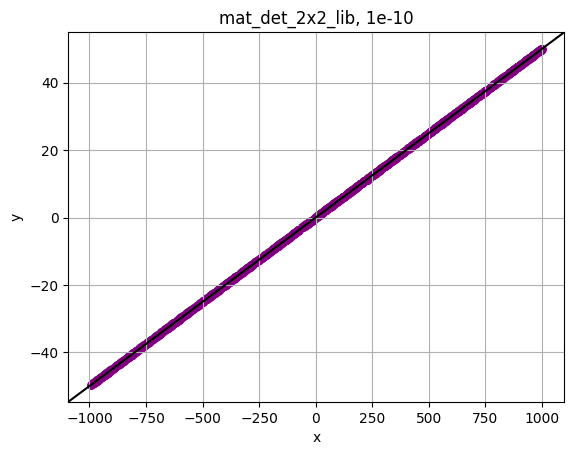

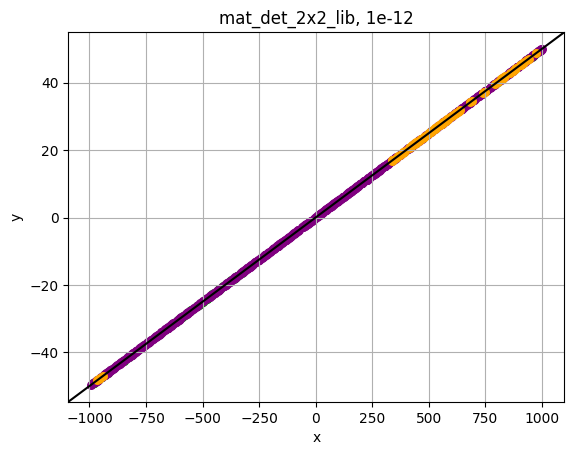

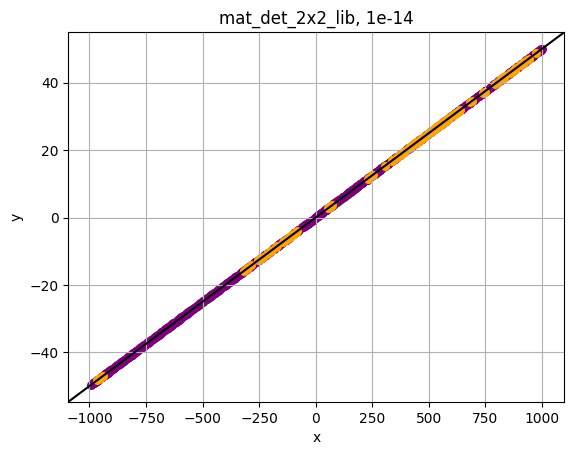

In [35]:
points32 = [np.float32(i) for i in points64]
det = [mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib]
eps = [10**-8, 10**-10, 10**-12, 10**-14]

row_labels = ['mat_det_3x3', 'mat_det_2x2', 'mat_det_3x3_lib', 'mat_det_2x2_lib']
data = [[] for _ in range(4)]
from time import process_time
data2 = [[] for _ in range(4)]

i = 0
for d in det:
    for e in eps:
        time_s = process_time()
        l, m, r = categorize_points(points_d, a, b, d, e)
        time_e = process_time()
        data2[i].append(time_e-time_s)
        data[i].append(len(m)/(len(l)+len(m)+len(r)))
        draw_line(l, m, r, d.__name__+", "+str(e))
    i += 1
df = pd.DataFrame(data, columns=eps, index=row_labels)  
print(df)
df = pd.DataFrame(data2, columns=eps, index=row_labels)  
print(df)

In [36]:
points64 = [points_a, points_b, points_c]
det = [mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib]
eps = [10**-8, 10**-10, 10**-12, 10**-14]

row_labels = ['mat_det_3x3', 'mat_det_2x2', 'mat_det_3x3_lib', 'mat_det_2x2_lib']

for p in points64:
    i = 0
    data = [[] for _ in range(4)]
    data2 = [[] for _ in range(4)]
    for d in det:
        for e in eps:
            time_s = process_time()
            l, m, r = categorize_points(p, a, b, d, e)
            time_e = process_time()
            data2[i].append(time_e-time_s)
            data[i].append((len(l),len(m),len(r)))
            #draw_line(l, m, r, d.__name__+", "+str(e))
        i += 1
    df = pd.DataFrame(data, columns=eps, index=row_labels)  
    print(df)
    df = pd.DataFrame(data2, columns=eps, index=row_labels)  
    #print(df)  



                      1.000000e-08       1.000000e-10       1.000000e-12  \
mat_det_3x3      (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_2x2      (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_3x3_lib  (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_2x2_lib  (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   

                      1.000000e-14  
mat_det_3x3      (49877, 0, 50123)  
mat_det_2x2      (49877, 0, 50123)  
mat_det_3x3_lib  (49877, 0, 50123)  
mat_det_2x2_lib  (49877, 0, 50123)  
                      1.000000e-08       1.000000e-10       1.000000e-12  \
mat_det_3x3      (50032, 0, 49968)  (50032, 0, 49968)  (50032, 0, 49968)   
mat_det_2x2      (50031, 8, 49961)  (50031, 8, 49961)  (50031, 8, 49961)   
mat_det_3x3_lib  (50032, 0, 49968)  (50032, 0, 49968)  (50032, 0, 49968)   
mat_det_2x2_lib  (50032, 6, 49962)  (50032, 6, 49962)  (50032, 6, 49962)   

                      1.000000e-14  
mat_det_3x3     

In [37]:
points32 = [np.float32(i) for i in points64]
det = [mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib]
eps = [10**-8, 10**-10, 10**-12, 10**-14]

row_labels = ['mat_det_3x3', 'mat_det_2x2', 'mat_det_3x3_lib', 'mat_det_2x2_lib']

for p in points32:
    i = 0
    data = [[] for _ in range(4)]
    data2 = [[] for _ in range(4)]
    for d in det:
        for e in eps:
            time_s = process_time()
            l, m, r = categorize_points(p, a, b, d, e)
            time_e = process_time()
            data2[i].append(time_e-time_s)
            data[i].append((len(l),len(m),len(r)))
            #draw_line(l, m, r, d.__name__+", "+str(e))
        i += 1
    df = pd.DataFrame(data, columns=eps, index=row_labels)  
    print(df)
    df = pd.DataFrame(data2, columns=eps, index=row_labels)  
    #print(df)  



                      1.000000e-08       1.000000e-10       1.000000e-12  \
mat_det_3x3      (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_2x2      (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_3x3_lib  (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   
mat_det_2x2_lib  (49877, 0, 50123)  (49877, 0, 50123)  (49877, 0, 50123)   

                      1.000000e-14  
mat_det_3x3      (49877, 0, 50123)  
mat_det_2x2      (49877, 0, 50123)  
mat_det_3x3_lib  (49877, 0, 50123)  
mat_det_2x2_lib  (49877, 0, 50123)  
                      1.000000e-08       1.000000e-10       1.000000e-12  \
mat_det_3x3      (50032, 0, 49968)  (50032, 0, 49968)  (50032, 0, 49968)   
mat_det_2x2      (50033, 6, 49961)  (50033, 6, 49961)  (50033, 6, 49961)   
mat_det_3x3_lib  (50032, 0, 49968)  (50032, 0, 49968)  (50032, 0, 49968)   
mat_det_2x2_lib  (50030, 9, 49961)  (50030, 9, 49961)  (50030, 9, 49961)   

                      1.000000e-14  
mat_det_3x3     